In [1]:
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,Flatten

In [2]:
count =0
dirs = os.listdir('Images/')
for dir in dirs:
    files=list(os.listdir('Images/'+dir))
    print(dir+'folder has ' + str(len(files)) +' images')


A+folder has 560 images
A-folder has 1003 images
AB+folder has 704 images
AB-folder has 757 images
B+folder has 646 images
B-folder has 737 images
O+folder has 848 images
O-folder has 708 images


In [3]:
#load images into arrays as dataset

base_dir = 'Images/'
img_size = 180
batch = 32


In [4]:

train_ds= tf.keras.utils.image_dataset_from_directory( base_dir,
                                                      seed=123,
                                                      validation_split=0.2,
                                                      subset = 'training',
                                                      batch_size = batch,
                                                      image_size=(img_size, img_size))

val_ds=tf.keras.utils.image_dataset_from_directory( base_dir,
                                                   seed=123,
                                                   validation_split=0.2,
                                                   subset ='validation',
                                                   batch_size=batch,
                                                   image_size=(img_size, img_size))


Found 5963 files belonging to 8 classes.
Using 4771 files for training.
Found 5963 files belonging to 8 classes.
Using 1192 files for validation.


In [5]:
blood_groups= train_ds.class_names
blood_groups


['A+', 'A-', 'AB+', 'AB-', 'B+', 'B-', 'O+', 'O-']

In [6]:
AUTOTUNE = tf.data.AUTOTUNE

In [7]:

train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)
val_ds=val_ds.cache().prefetch(buffer_size = AUTOTUNE)


In [8]:

#data agumentation
data_agumentation = Sequential([
    layers.RandomFlip("horizontal", input_shape=(img_size,img_size,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])


C:\Users\simha\Envs\anaconda\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
model = Sequential([
  data_agumentation,
  layers.Rescaling(1./255),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(2,2),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(2,2),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(2,2),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(2,2),
  layers.Dropout(0.5),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dense(8, name="outputs")
])

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
 epochs = 50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
    
)

Epoch 1/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 359s 2s/step - accuracy: 0.1685 - loss: 2.2616 - val_accuracy: 0.2701 - val_loss: 1.7398
Epoch 2/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 337s 2s/step - accuracy: 0.3265 - loss: 1.6685 - val_accuracy: 0.4606 - val_loss: 1.3430
Epoch 3/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 345s 2s/step - accuracy: 0.4206 - loss: 1.4153 - val_accuracy: 0.5403 - val_loss: 1.1447
Epoch 4/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 376s 2s/step - accuracy: 0.5955 - loss: 1.0624 - val_accuracy: 0.6795 - val_loss: 0.8530
Epoch 5/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 400s 2s/step - accuracy: 0.6609 - loss: 0.8581 - val_accuracy: 0.7466 - val_loss: 0.6791
Epoch 6/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 367s 2s/step - accuracy: 0.7273 - loss: 0.7106 - val_accuracy: 0.8037 - val_loss: 0.5307
Epoch 7/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 409s 2s/step - accuracy: 0.7531 - loss: 0.6321 - val_accuracy: 0.7727 - val_loss: 0.5948
Epoch 8/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 345s 2s/step - accuracy: 0.7585 - loss: 0.6258 - val_accu

In [12]:
loss0, accuracy0 = model.evaluate(val_ds)
print(accuracy0)
print(loss0)
loss1, accuracy1 = model.evaluate(train_ds)
print(accuracy1)
print(loss1)

38/38 ━━━━━━━━━━━━━━━━━━━━ 23s 597ms/step - accuracy: 0.8998 - loss: 0.2993
0.899328887462616
0.30890944600105286
150/150 ━━━━━━━━━━━━━━━━━━━━ 82s 548ms/step - accuracy: 0.9228 - loss: 0.2040
0.9214001297950745
0.20099490880966187


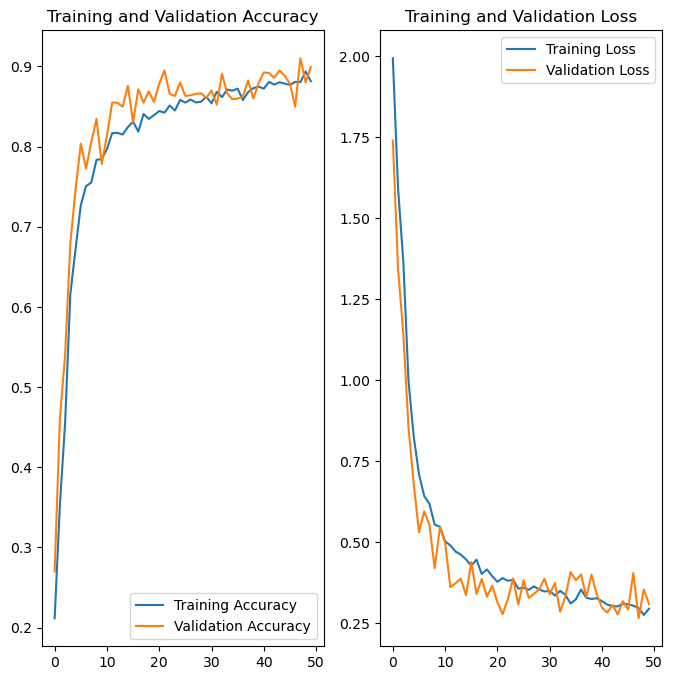

In [16]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [17]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(180,180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array,0)
    predictions= model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = 'the Image belongs to ' + blood_groups[np.argmax(result)] + ' with a score of '+ str(np.max(result)*100)
    return outcome

In [26]:
print(classify_images('sample/cluster_5_866.BMP'))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
the Image belongs to AB-with a score of 96.59239649772644


In [29]:
model.save('Blood_Group_Mode3.h5')

In [28]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 45, 45, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 22, 22, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 11, 11, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 11, 11, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      15,860,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ outputs (Dense)                      │ (None, 8)                   │           4,104 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 48,758,234 (186.00 MB)

 Trainable params: 16,252,744 (62.00 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 32,505,490 (124.00 MB)